# Exercise 2.1
Remove the linear trend by applying backward differencing on timeseries created from the following models:
- $X_t \sim 0.5t + 1 + U_t \quad\text{where}\; U_t \sim U(−1, 1)$
- $X_t \sim 2t^2 + 3t − 1 + U_t \quad\text{where}\; U_t \sim U(−200, 200)$

Plot the results. Also compare the length of the different time series and transformations.

$X_t \sim 0.5t + 1 + U_t \quad\text{where}\; U_t \sim U(−1, 1)$

[1] 100

[1] 99

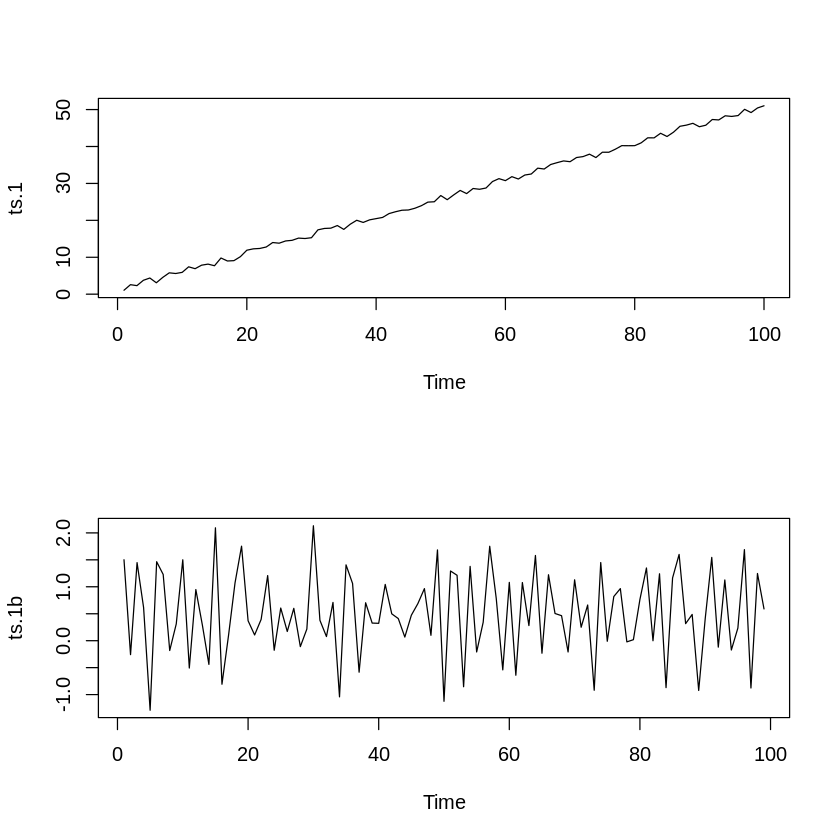

In [1]:
set.seed(123)
par(mfrow = c(2, 1))

t <- seq(1, 100, length = 100)
data <- 0.5 * t + 1 + runif(100, -1, 1)
ts.1 <- ts(data)
length(ts.1)

plot(ts.1)

# apply backward differencing
ts.1b <- ts(diff(data, lag = 1, differences = 1))
length(ts.1b)

plot(ts.1b)

$X_t \sim 2t^2 + 3t − 1 + U_t \quad\text{where}\; U_t \sim U(−200, 200)$

[1] 100

[1] 99

[1] 98

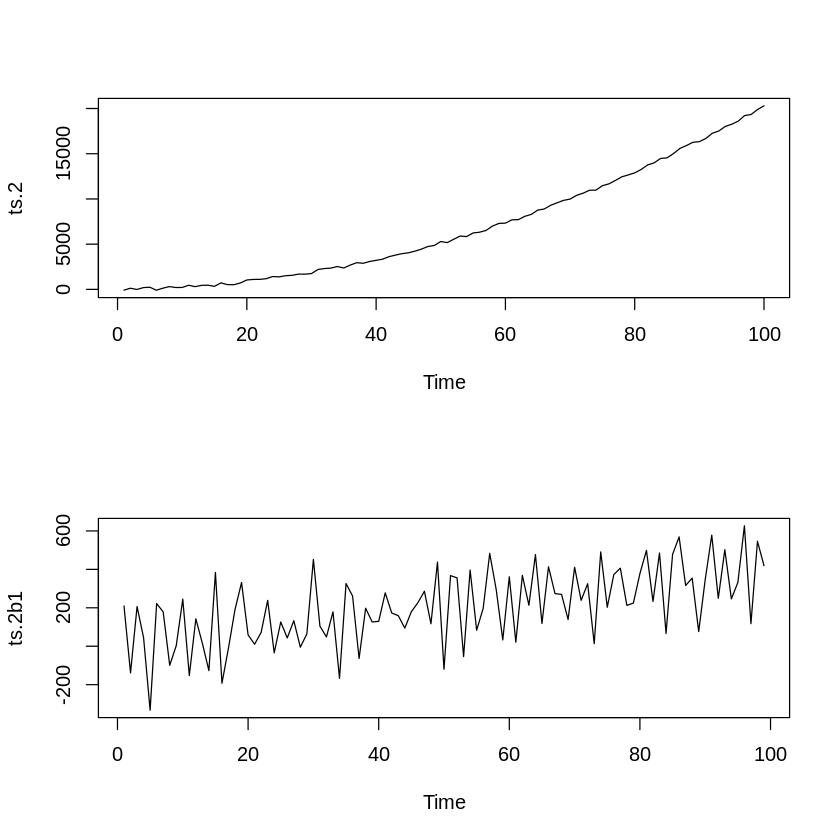

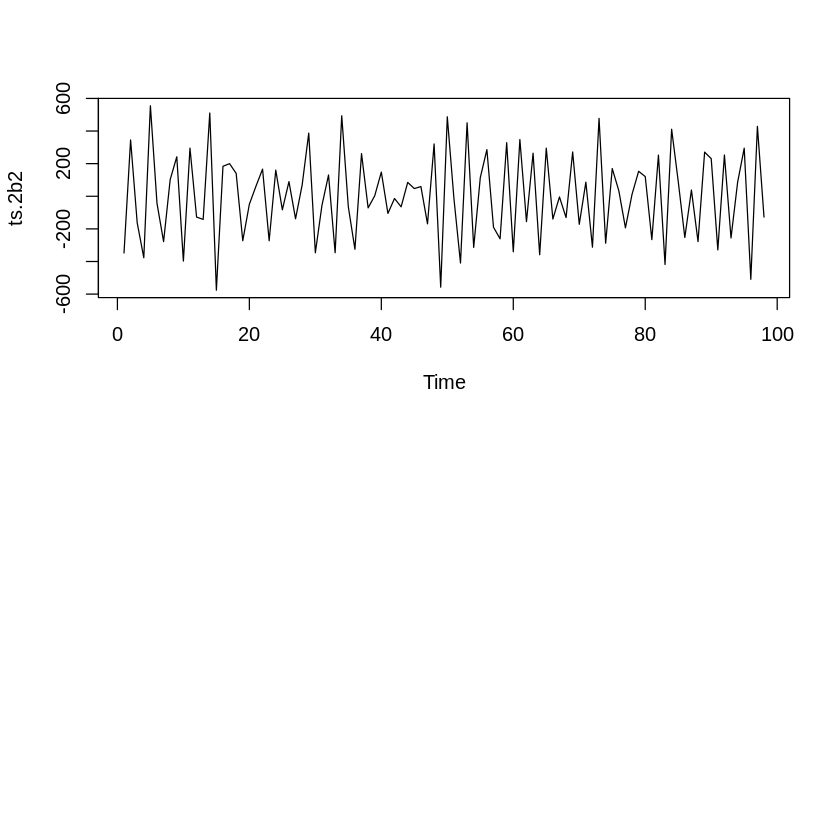

In [2]:
set.seed(123)
par(mfrow = c(2, 1))

t <- seq(1, 100, length = 100)
data <- 2 * t^2 + 3 * t - 1 + runif(100, -200, 200)
ts.2 <- ts(data)
length(ts.2)

plot(ts.2)

# apply higher order backward differencing
ts.2b1 <- ts(diff(data, lag = 1, differences = 1))
length(ts.2b1)

plot(ts.2b1)

ts.2b2 <- ts(diff(data, lag = 1, differences = 2))
length(ts.2b2)

plot(ts.2b2)

# Exercise 2.2
We reconsider the data set from exercise 1.2 about residential construction in the USA from January 1966 to December 1974.
- Decompose the time series in trend, seasonal component and remainder using the non-parametric STL method, and plot the results.
- The special filter $Y_t = \frac{1}{24} (X_{t−6} + 2X_{t−5} + ... + 2X_t + ... + X_{t+6})$ can be used for computing a trend estimate. Plot this, the STL trend and the data in a single plot. What are the differences between the two methods?
- Try to remove the trend and seasonal effects by computing differences. After removing seasonal effects, choose some linear trend elimination method and plot the outcome.

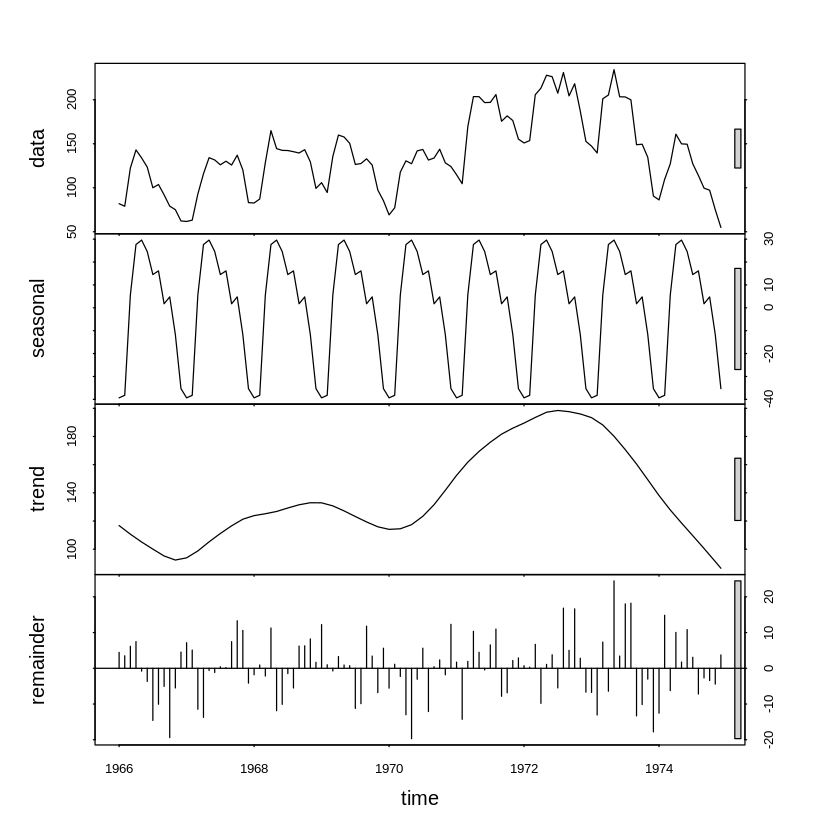

In [3]:
hstart <- read.table("../data/hstart.dat")
ts.dat <- ts(hstart[1:108,1],start=c(1966,1),frequency=12)
data.stl <- stl(ts.dat, s.window = "periodic")

plot(data.stl)

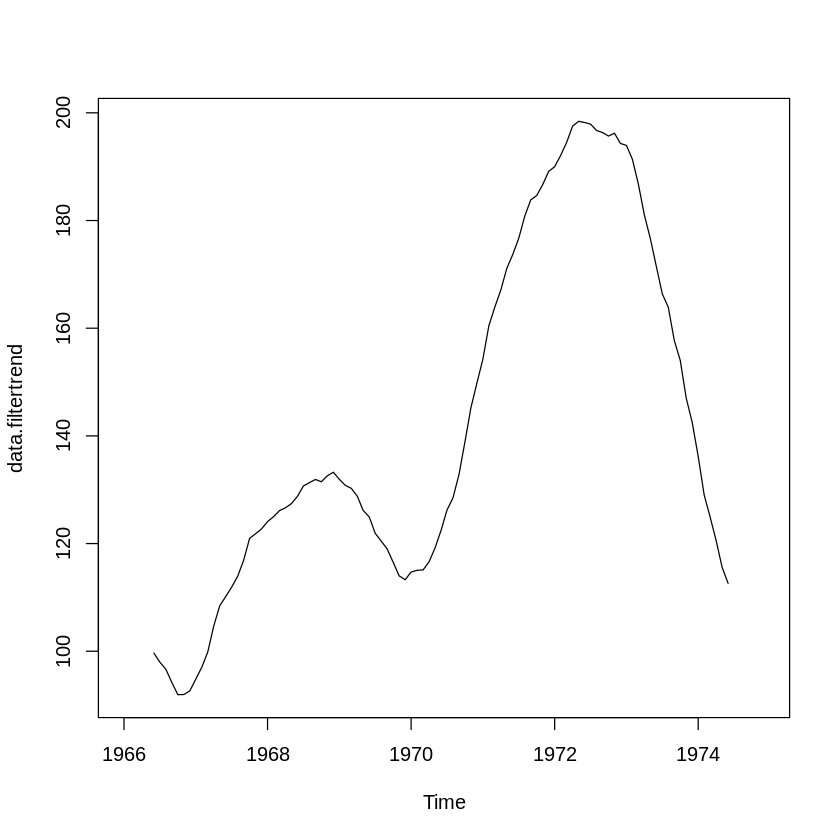

In [4]:
weights <- c(rep(1, 12))/12
data.filtertrend <- filter(ts.dat, filter = weights, sides = 2)

plot(data.filtertrend)

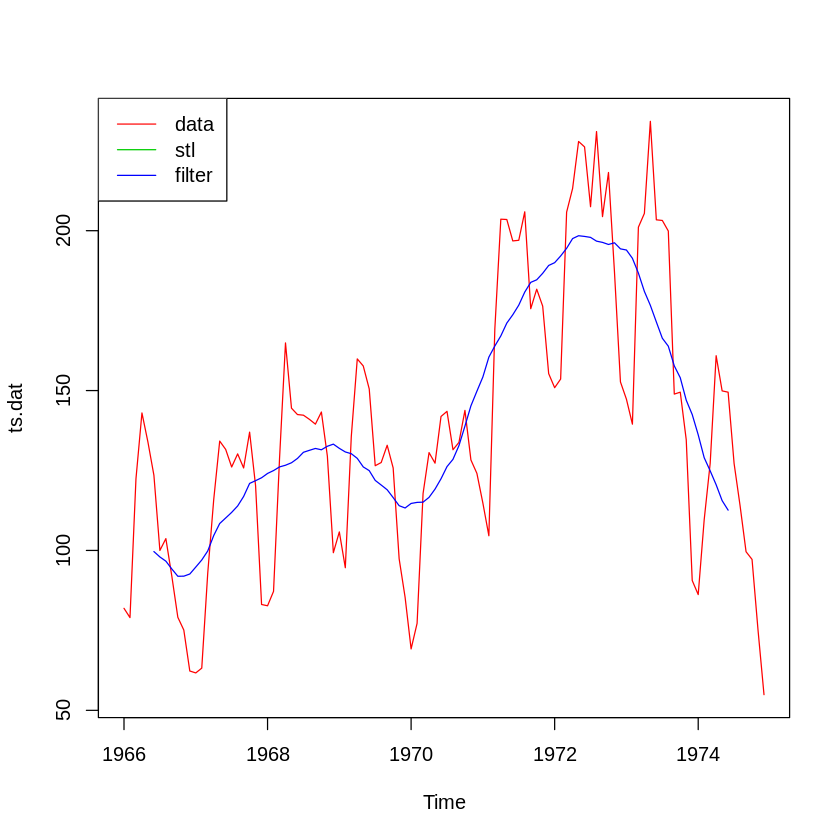

In [5]:
plot(ts.dat,type = "l",col = 2)
# struggling to get the trend component from the stl output
# lines(data.stl$time.series,type = "l",col = 3)
lines(data.filtertrend,type = "l",col = 4)
legend("topleft",c("data", "stl", "filter"),lty = 1,col = 2:4)

# Exercise 2.3
To test ideas and algorithms, R comes with built-in data sets. The data used in this exercise is called co2 and contains atmospheric concentrations of CO2 in parts per million. In the R-hints below is shown how to load the data into R.

Use backward differencing on the co2 data to abolish the seasonality effect. Figure out what value for the lag is to choose for an optimum reduction of the seasonality?

What happens if you choose other values for the lag?

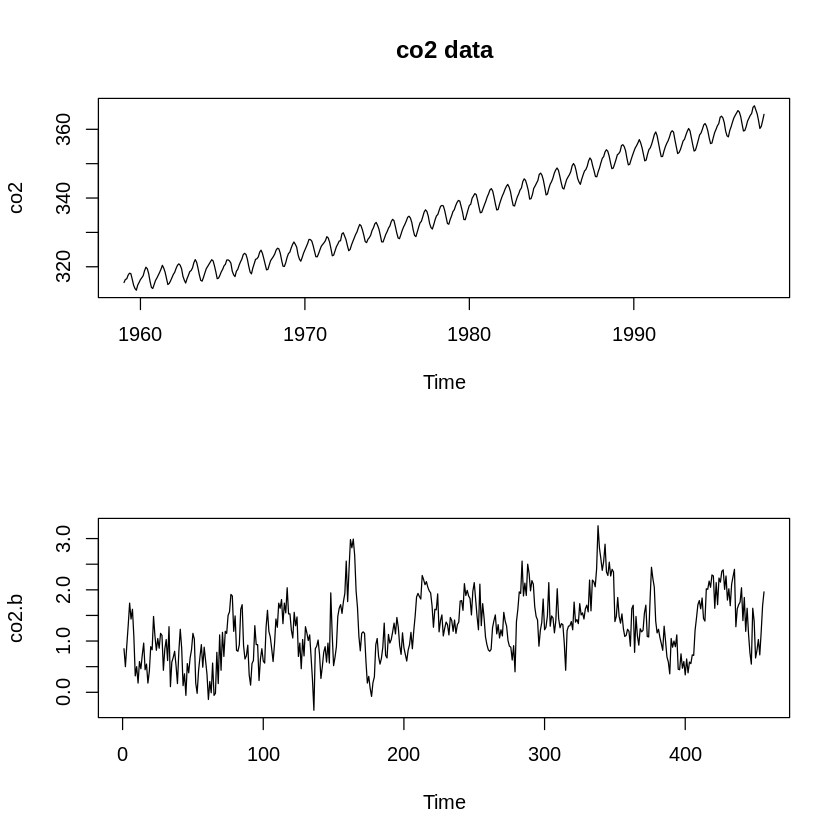

In [6]:
par(mfrow = c(2, 1))
data(co2)
plot(co2, main = "co2 data")

co2.b <- ts(diff(co2, lag = 12, differences = 1))
plot(co2.b)

It appears, that with a lag of 12, the seasonality is removed.